### New Restaurant opening after COVID-19 crisis

<font color=red> Import necessary Libraries

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

<font color=red> Define Foursquare Credentials and Version

In [3]:
CLIENT_ID = 'PGIIRAZ1ZJAA1OAK3YLNFCBEPI5KTLZINAXU31LHJOPC2R20' # your Foursquare ID
CLIENT_SECRET = 'OMGFXAJCLGX1WWMVTDSLXUKIEQ55BUZK3WDS3Q5KZPX3DOPW' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PGIIRAZ1ZJAA1OAK3YLNFCBEPI5KTLZINAXU31LHJOPC2R20
CLIENT_SECRET:OMGFXAJCLGX1WWMVTDSLXUKIEQ55BUZK3WDS3Q5KZPX3DOPW


<font color=red> Converting the Madrid (Spain) city center to its latitude and longitude coordinates

In [4]:
address = '28013, España'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.41897486205902 -3.7068984226724724


<font color=red> SEARCH FOR RESTAURANTS

In [13]:
search_query = 'Comida'
radius = 20000

In [14]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=PGIIRAZ1ZJAA1OAK3YLNFCBEPI5KTLZINAXU31LHJOPC2R20&client_secret=OMGFXAJCLGX1WWMVTDSLXUKIEQ55BUZK3WDS3Q5KZPX3DOPW&ll=40.41897486205902,-3.7068984226724724&v=20180604&query=Comida&radius=20000&limit=30'

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f16b721a536c57dc65c8992'},
 'response': {'venues': [{'id': '57cc0492498edd9b8feca78a',
    'name': 'Palmira Comida Casera Arabe',
    'location': {'lat': 40.42025,
     'lng': -3.707284,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.42025,
       'lng': -3.707284}],
     'distance': 145,
     'postalCode': '28013',
     'cc': 'ES',
     'city': 'Madrid',
     'state': 'Madrid',
     'country': 'España',
     'formattedAddress': ['28013 Madrid Madrid', 'España']},
    'categories': [{'id': '52e81612bcbc57f1066b79ff',
      'name': 'Halal Restaurant',
      'pluralName': 'Halal Restaurants',
      'shortName': 'Halal',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/halal_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1595324008',
    'hasPerk': False},
   {'id': '57cc03cd498e17c459d62e24',
    'name': 'Palmira Comida Casera Arabe',
    'location': {'lat': 40.420288,
     'lng': -3.707

<font color=red> Transform it into a *pandas* dataframe

In [16]:
from pandas import json_normalize
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

id                         name  \
0  57cc0492498edd9b8feca78a  Palmira Comida Casera Arabe   
1  57cc03cd498e17c459d62e24  Palmira Comida Casera Arabe   
2  4df132cbd1649c8a28d8fd14              Comida Japonesa   
3  4e73a9492271391c70732870   Fuente De Deliciosa Comida   
4  54a1c20b498e739dab103742              Comida Mexicana   

                                          categories    referralId  hasPerk  \
0  [{'id': '52e81612bcbc57f1066b79ff', 'name': 'H...  v-1595324008    False   
1  [{'id': '52e81612bcbc57f1066b79ff', 'name': 'H...  v-1595324008    False   
2  [{'id': '4bf58dd8d48988d111941735', 'name': 'J...  v-1595324008    False   
3  [{'id': '4bf58dd8d48988d145941735', 'name': 'C...  v-1595324008    False   
4  [{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...  v-1595324008    False   

   location.lat  location.lng  \
0     40.420250     -3.707284   
1     40.420288     -3.707282   
2     40.421163     -3.714598   
3     40.421394     -3.709970   
4     40.411608     -3.708542   

                             location.labeledLatLngs  location.distance  \
0  [{'label': 'display', 'lat': 40.42025, 'lng': ...                145   
1  [{'label': 'display', 'lat': 40.420288, 'lng':...                149   
2  [{'label': 'display', 'lat': 40.42116258790185...                696   
3  [{'label': 'display', 'lat': 40.42139369402961...                374   
4  [{'label': 'display', 'lat': 40.41160823472874...                831   

  location.postalCode location.cc location.city location.state  \
0               28013          ES        Madrid         Madrid   
1                 NaN          ES        Madrid         Madrid   
2                 NaN          ES        Madrid         Madrid   
3                 NaN          ES        Madrid         Madrid   
4                 NaN          ES        Madrid         Madrid   

  location.country                          location.formattedAddress  \
0           España                      [28013 Madrid Madrid, España]   
1           España                            [Madrid Madrid, España]   
2           España                            [Madrid Madrid, España]   
3           España                            [Madrid Madrid, España]   
4           España  [San Marcos (Calle Libertad), Madrid Madrid, E...   

  location.address location.crossStreet venuePage.id  
0              NaN                  NaN          NaN  
1              NaN                  NaN          NaN  
2              NaN                  NaN          NaN  
3              NaN                  NaN          NaN  
4       San Marcos       Calle Libertad          NaN

<font color=red> Clean & Filter dataframe

In [20]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

name           categories        lat       lng  \
0  Palmira Comida Casera Arabe     Halal Restaurant  40.420250 -3.707284   
1  Palmira Comida Casera Arabe     Halal Restaurant  40.420288 -3.707282   
2              Comida Japonesa  Japanese Restaurant  40.421163 -3.714598   
3   Fuente De Deliciosa Comida   Chinese Restaurant  40.421394 -3.709970   
4              Comida Mexicana   Mexican Restaurant  40.411608 -3.708542   

                                      labeledLatLngs  distance postalCode  cc  \
0  [{'label': 'display', 'lat': 40.42025, 'lng': ...       145      28013  ES   
1  [{'label': 'display', 'lat': 40.420288, 'lng':...       149        NaN  ES   
2  [{'label': 'display', 'lat': 40.42116258790185...       696        NaN  ES   
3  [{'label': 'display', 'lat': 40.42139369402961...       374        NaN  ES   
4  [{'label': 'display', 'lat': 40.41160823472874...       831        NaN  ES   

     city   state country                                   formattedAddress  \
0  Madrid  Madrid  España                      [28013 Madrid Madrid, España]   
1  Madrid  Madrid  España                            [Madrid Madrid, España]   
2  Madrid  Madrid  España                            [Madrid Madrid, España]   
3  Madrid  Madrid  España                            [Madrid Madrid, España]   
4  Madrid  Madrid  España  [San Marcos (Calle Libertad), Madrid Madrid, E...   

      address     crossStreet                        id  
0         NaN             NaN  57cc0492498edd9b8feca78a  
1         NaN             NaN  57cc03cd498e17c459d62e24  
2         NaN             NaN  4df132cbd1649c8a28d8fd14  
3         NaN             NaN  4e73a9492271391c70732870  
4  San Marcos  Calle Libertad  54a1c20b498e739dab103742

<font color=red> Visualize Restaurants

In [19]:
dataframe_filtered.name.head()

0    Palmira Comida Casera Arabe
1    Palmira Comida Casera Arabe
2                Comida Japonesa
3     Fuente De Deliciosa Comida
4                Comida Mexicana
Name: name, dtype: object

In [ ]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around Madrid City Center

# add a red circle marker to represent Madrid City Center
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Madrid City Center',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

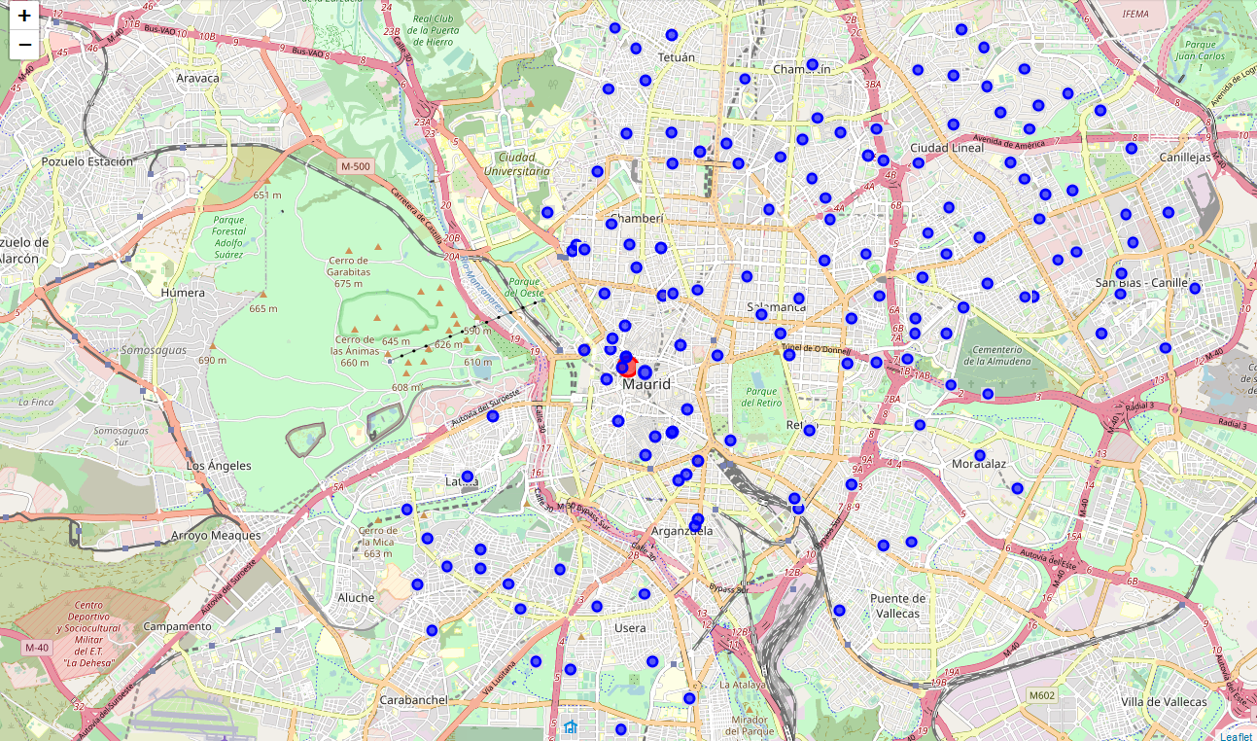

<font color=red> CLUSTER RESTAURANTS

<font color=red> Collecting Neiborhood Data

In [ ]:
!wget -q -O 'madrid_data.json' C:\Users\OP\Temp\Madrid_neighborhood
with open('madrid_data.json') as json_data:
    madrid_data = json.load(json_data)

In [ ]:
neighborhoods_data = madrid_data['features']
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [ ]:
address = 'Madrid, Spain'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Madrid are {}, {}.'.format(latitude, longitude))

<font color=red> Explore Restaurants in Madrid

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
madrid_restaurants = getNearbyVenues(names=madrid_data['Neighborhood'],
                                   latitudes=madrid_data['Latitude'],
                                   longitudes=madrid_data['Longitude']
                                  )


<font color=red> Neighborhood Analysis and Grouping

In [ ]:
# one hot encoding
madrid_onehot = pd.get_dummies(madrid_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
madrid_onehot['Neighborhood'] = madrid_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [madrid_onehot.columns[-1]] + list(madrid_onehot.columns[:-1])
madrid_onehot = madrid_onehot[fixed_columns]

madrid_grouped = madrid_onehot.groupby('Neighborhood').mean().reset_index()

<font color=red> Clustering by Restaurant Type

In [ ]:
types = set()
def func(x):
    if(type(x) == list):
        for y in x:
            types.add(y.strip())
_ = rest_df['rest_type'].str.split(',').apply(func)
column_names = list(types)
# instantiate the dataframe

In [ ]:
neighborhood = pd.DataFrame(columns=column_names)
neighborhood
neighborhood['neighborhood'] = rest_df.groupby('location').groups.keys()
neighborhood = neighborhood.set_index('neighborhood').fillna(0)
neighborhood
i=0
for i in range(0,len(rest_df)):
    for x in types:
        if type(rest_df.loc[i, 'rest_type']) == str and x in rest_df.loc[i, 'rest_type']:
            neighborhood.loc[rest_df.loc[i, 'location'], x] = neighborhood.loc[rest_df.loc[i, 'location'], x]+1

In [ ]:
kclusters = 2

madrid_grouped_clustering = neighborhood

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

In [ ]:
# add clustering labels
neighborhood.drop('Cluster Labels', inplace=True, axis=1)
neighborhood.insert(0, 'Cluster Labels', kmeans.labels_)

In [ ]:
type_df = pd.merge(rest_df[['location','location_latitude', 'location_longitude']].groupby('location').first(), neighborhood, left_index=True, right_index=True)

In [ ]:
<font color=red> Showing results Map

In [ ]:
rest_map = folium.Map(location=[40.41897, -3,706898], zoom_start=11) # generate map centred Madrid


labels = set(kmeans.labels_)
rest_map = folium.Map(location=[40.41897, -3,706898], zoom_start=11) # generate map centred Madrid


for label in labels:
    group = type_df.groupby('Cluster Labels').get_group(label)
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.features.CircleMarker(
                [lat, lng],
                radius=5, # define how big you want the circle markers to be
                color='yellow',
                fill=True,
                fill_color='blue',
                fill_opacity=0.6,
            )
        )
        i+=1
        
    x = group.index
    i=0
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.features.Marker(
                [lat, lng],
                popup= group.index[i],
                icon=folium.Icon(color=colors[j], icon='cloud')
            )
        )
        i+=1
    j+=1


rest_map

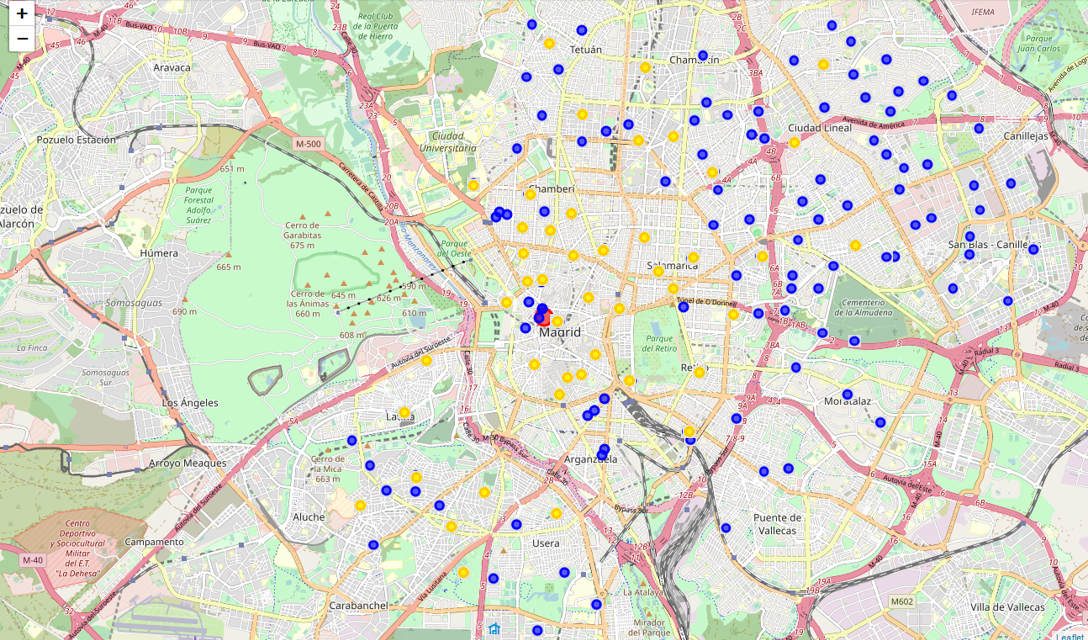